1 - Análise Exploratória e Preditiva

Bibliotecas importadas

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


1 Análise Exploratória dos dados

a. Carregue a base de dados media_precos_carros_brasil.csv

In [6]:
dados = pd.read_csv('precos_carros_brasil.csv')

In [7]:
dados.shape

(267542, 11)

In [11]:
dados.isna().sum()
dados = dados.dropna()
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [12]:
dados.duplicated().sum()

2

d. Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo
de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [14]:
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados [col].dtype == 'object']

In [15]:
dados[numericas_cols].describe()

,year_of_reference,year_model,avg_price_brl
count,202297.000000,202297.000000,202297.000000
mean,2021.564694,2011.271527,52756.909153
std,0.571903,6.376234,51628.677716
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [16]:
dados[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202297,202297,202297,202297,202297,202297,202297,202297
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,3r6c277cnqcb,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,2,44962,425,168685,161885,47420


In [18]:
dados['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [19]:
dados['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33151
Renault            29192
Nissan             12090
Name: count, dtype: int64

2 Visualização dos dados

a. Gere um gráfico da distribuição da quantidade de carros por marca

[Text(0, 0, '44962'),
 Text(0, 0, '44312'),
 Text(0, 0, '38590'),
 Text(0, 0, '33151'),
 Text(0, 0, '29192'),
 Text(0, 0, '12090')]

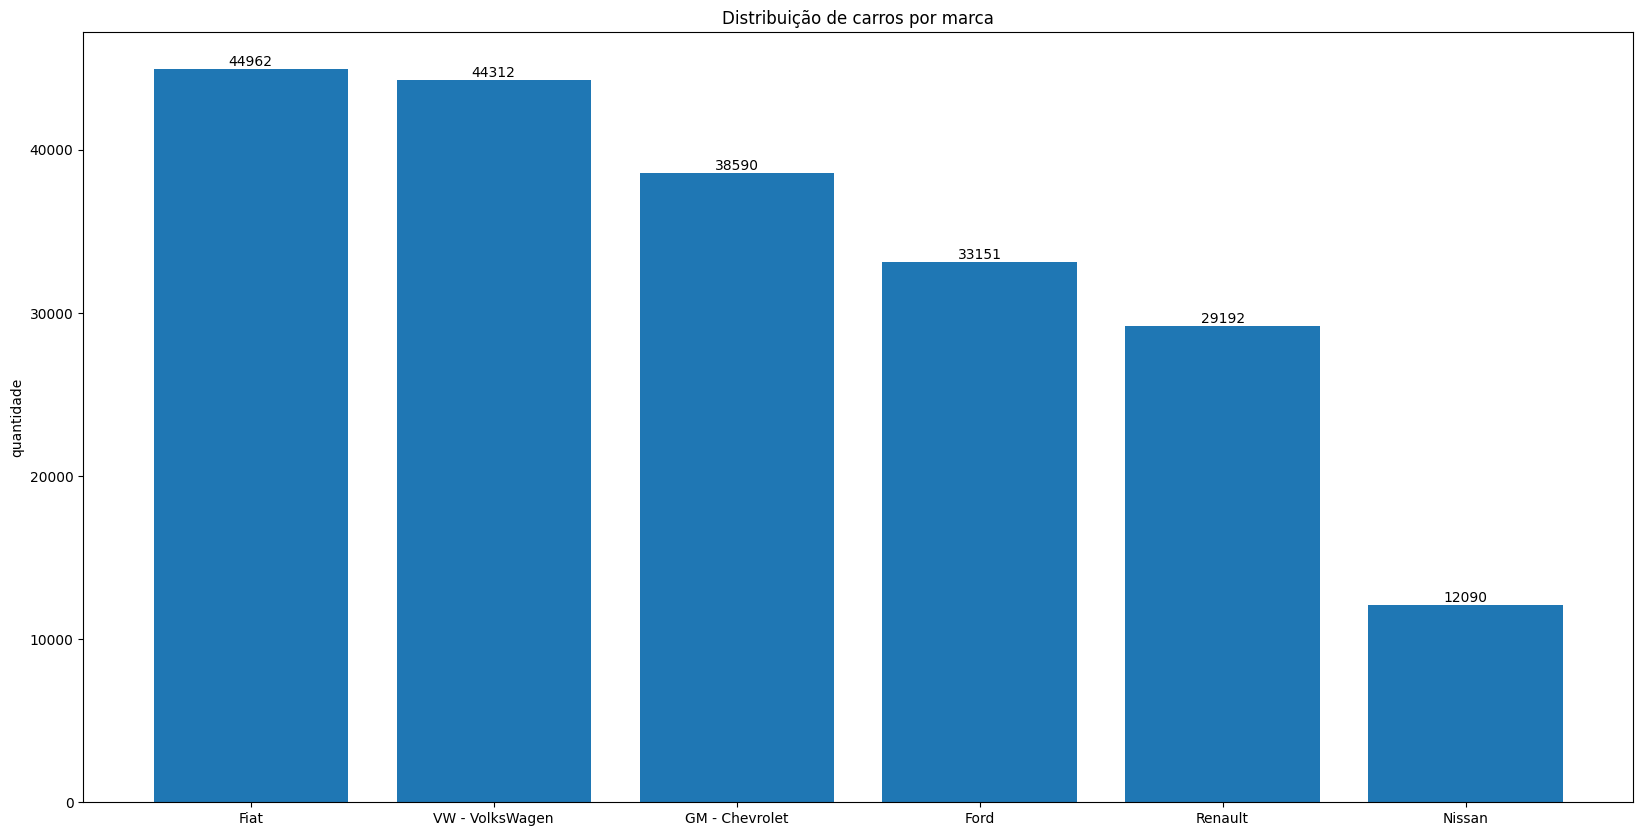

In [21]:
valores_contados = dados['brand'].value_counts()

plt.figure(figsize=(20,10))
grafico_1 = plt.bar(valores_contados.index, valores_contados.values)
plt.title('Distribuição de carros por marca')
plt.ylabel('quantidade')
plt.bar_label(grafico_1, size=10)

2 b) gerar gráfico da distribuição da quantidade de carros por tipo de engrenagem

[Text(0, 0, '161885'), Text(0, 0, '40412')]

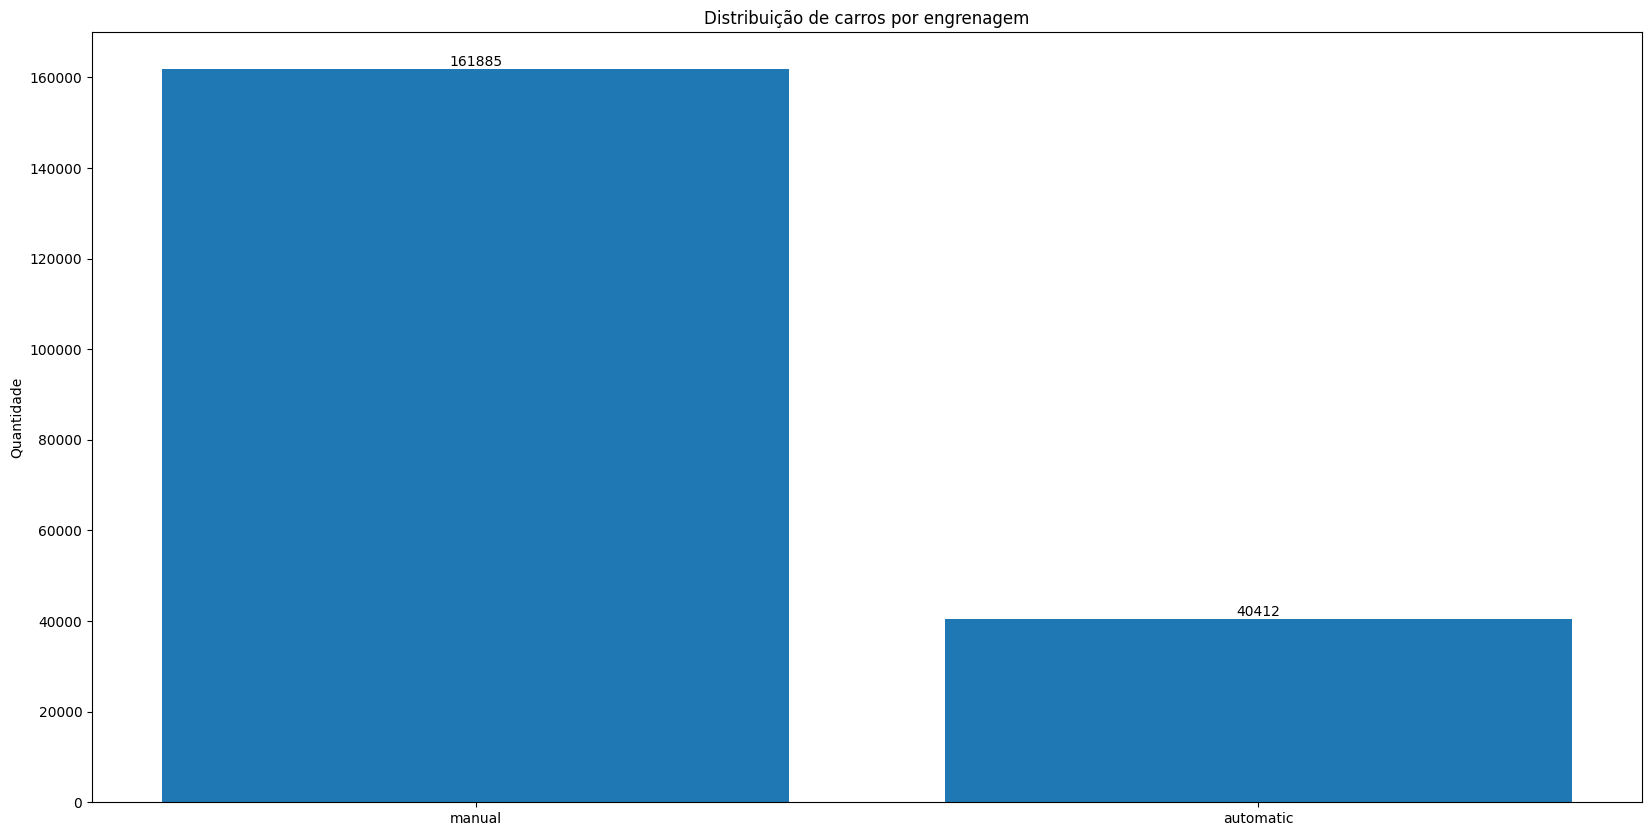

In [22]:
valores_contados_2 = dados['gear'].value_counts()

plt.figure(figsize=(20,10))
grafico_2 = plt.bar(valores_contados_2.index, valores_contados_2.values)
plt.title('Distribuição de carros por engrenagem')
plt.ylabel('Quantidade')
plt.bar_label(grafico_2, size=10)

2 C) Gerar gráfico da evolução da média de preços dos carros ao longo dos meses de 2022

[Text(0, 0, '50849'),
 Text(0, 0, '53664'),
 Text(0, 0, '55848'),
 Text(0, 0, '49197'),
 Text(0, 0, '51905'),
 Text(0, 0, '53059'),
 Text(0, 0, '52515'),
 Text(0, 0, '50083'),
 Text(0, 0, '51481'),
 Text(0, 0, '55468'),
 Text(0, 0, '54903'),
 Text(0, 0, '54405')]

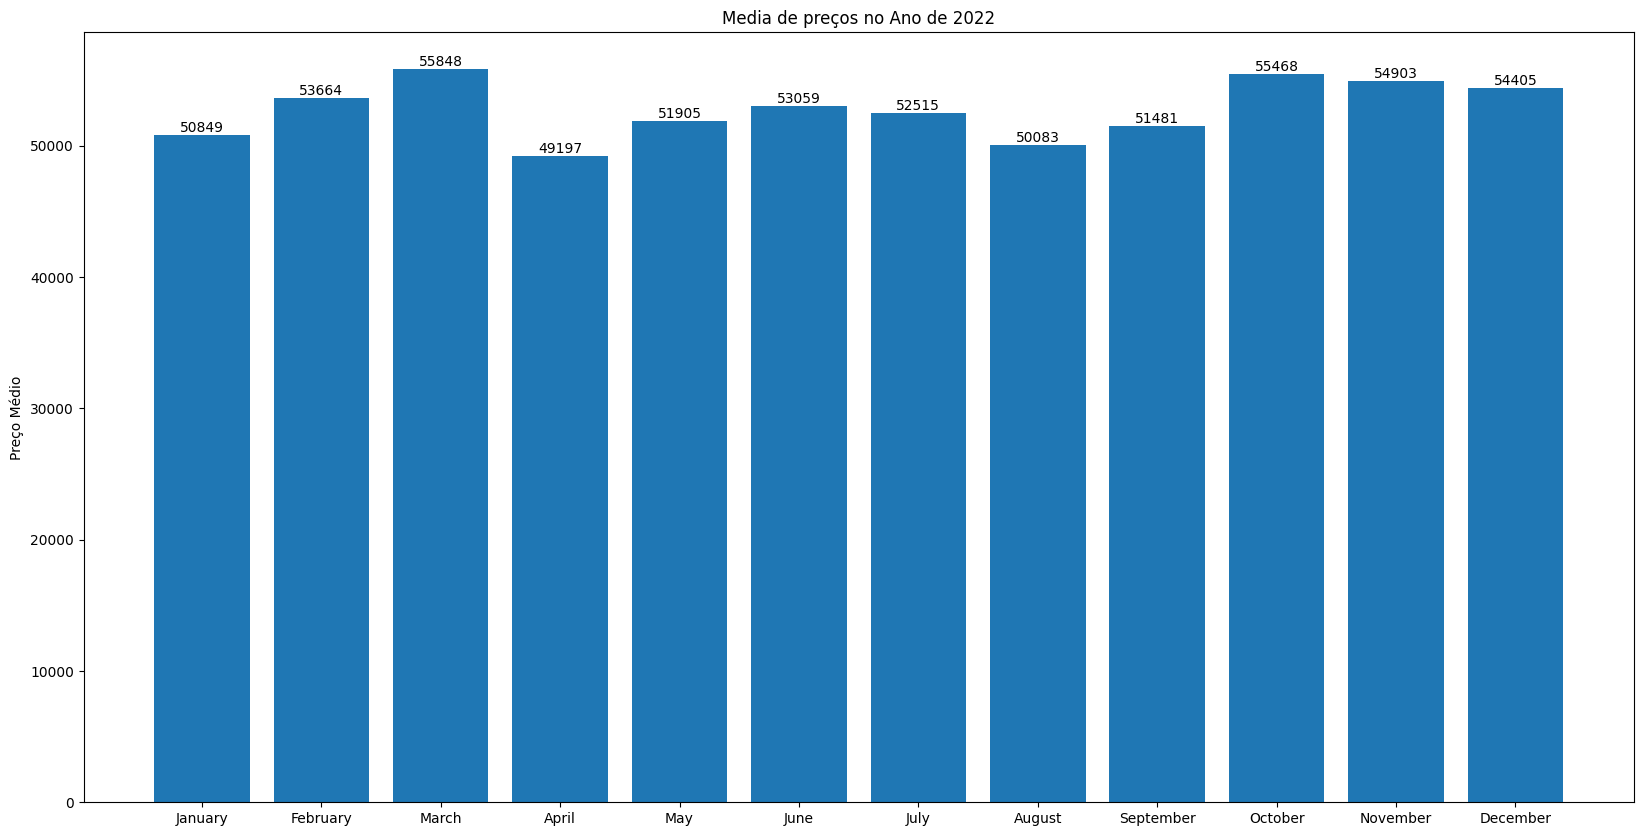

In [23]:
ano_2022 = dados[dados.year_of_reference == 2022]

plt.figure(figsize=(20,10))
grafico_3 = plt.bar(ano_2022['month_of_reference'].unique(),dados.groupby('month_of_reference')['avg_price_brl'].mean().round())
plt.ylabel('Preço Médio')
plt.title('Media de preços no Ano de 2022')
plt.bar_label(grafico_3, size=10)

2 d) Gráfico de distribuição média de preço dos carros por marca

[Text(0, 0, '97397'),
 Text(0, 0, '84769'),
 Text(0, 0, '88157'),
 Text(0, 0, '94231'),
 Text(0, 0, '44028'),
 Text(0, 0, '99735')]

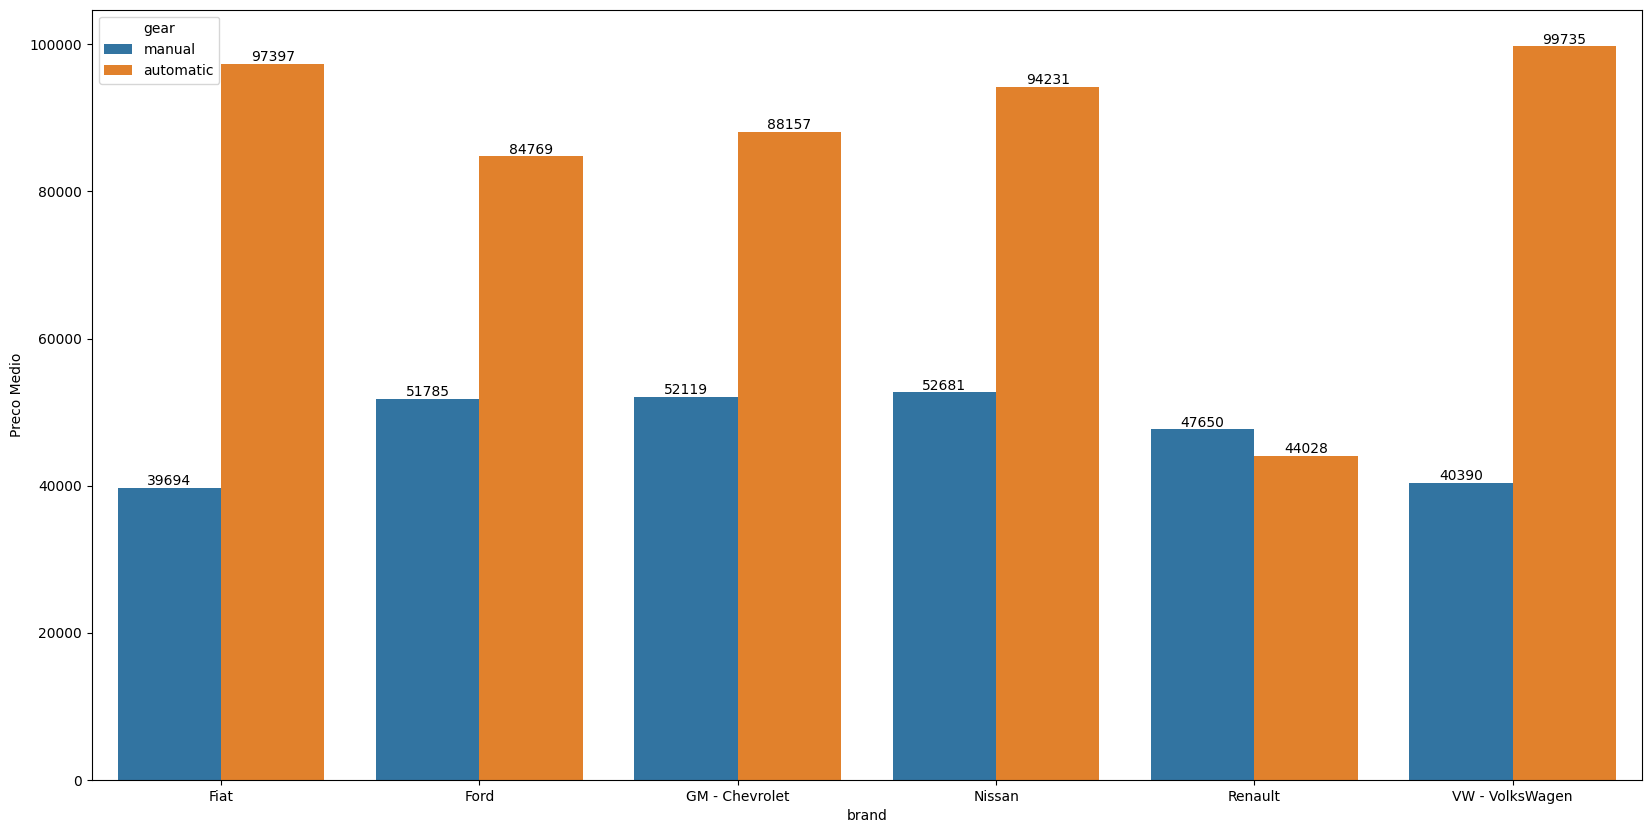

In [28]:
media_marca_engrenagem = dados.groupby(['brand','gear'])['avg_price_brl'].mean().round()
media_marca_engrenagem = media_marca_engrenagem.reset_index(name='Preco Medio')

plt.figure(figsize=(20,10))
ax= sns.barplot(data=media_marca_engrenagem,x='brand', y='Preco Medio', hue='gear', hue_order=['manual','automatic'])
ax.bar_label(ax.containers[0], size=10)
ax.bar_label(ax.containers[1], size=10)

